In [ ]:
"""Dataset Info"""

"""
Name of dataset: Research Organization Registry Data

Dataset link: https://zenodo.org/records/7926988

Dataset download: https://zenodo.org/records/7926988/files/v1.25-2023-05-11-ror-data.zip?download=1

License: ROR is freely and openly available to anyone in public. There is no cost to access and use ROR data and services.

Size: v1.25-2023-05-11-ror-data.csv is 32.4 MB

"""

In [ ]:
"""
Characteristics of this dataset:

This ROR data includes most of the well-known funders in the world, which can be used for Education, Govenment, Facility, etc. 
It contains the funder's information, such as name, links, wikipedia url, country, and so on.
Overall, there are 105294 rows for this data. 
Some of the data is string, some of them are numbers, some of them are urls. 
"""

In [32]:
import pandas as pd
import bqplot
import bqplot.pyplot as plt
import json
import pandas as pd 
import re
import numpy as np
import random
from functools import reduce
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [33]:
df = pd.read_csv('v1.25-2023-05-11-ror-data.csv',encoding='iso-8859-1')
new_df = df[:5000]
new_df

,id,name,types,status,links,aliases,labels,acronyms,wikipedia_url,established,...,country.country_name,external_ids.GRID.preferred,external_ids.GRID.all,external_ids.ISNI.preferred,external_ids.ISNI.all,external_ids.FundRef.preferred,external_ids.FundRef.all,external_ids.Wikidata.preferred,external_ids.Wikidata.all,relationships
0,https://ror.org/019wvm592,Australian National University,Education,active,http://www.anu.edu.au/,NaN,NaN,ANU,http://en.wikipedia.org/wiki/Australian_Nation...,1946.0,...,Australia,grid.1001.0,grid.1001.0,NaN,0000 0001 2180 7477,5.011000e+11,501100000995;501100001151;100009020,NaN,Q127990,"Related: https://ror.org/041c7s516, https://ro..."
1,https://ror.org/02bfwt286,Monash University,Education,active,http://www.monash.edu/,NaN,NaN,NaN,http://en.wikipedia.org/wiki/Monash_University,1958.0,...,Australia,grid.1002.3,grid.1002.3,NaN,0000 0004 1936 7857,5.011000e+11,501100001779;501100001144;501100007917;5011000...,NaN,Q598841,"Related: https://ror.org/0484pjq71, https://ro..."
2,https://ror.org/00rqy9422,University of Queensland,Education,active,http://www.uq.edu.au/,NaN,NaN,UQ,http://en.wikipedia.org/wiki/University_of_Que...,1909.0,...,Australia,grid.1003.2,grid.1003.2,NaN,0000 0000 9320 7537,5.011000e+11,501100001794;501100008407;501100005268,NaN,Q866012,"Related: https://ror.org/010g47133, https://ro..."
3,https://ror.org/01sf06y89,Macquarie University,Education,active,http://mq.edu.au/,NaN,NaN,NaN,http://en.wikipedia.org/wiki/Macquarie_University,1964.0,...,Australia,grid.1004.5,grid.1004.5,NaN,0000 0001 2158 5405,NaN,501100001230,NaN,Q741082,Related: https://ror.org/0402tt118; Child: htt...
4,https://ror.org/01kj2bm70,Newcastle University,Education,active,http://www.ncl.ac.uk/,University of Newcastle upon Tyne,NaN,NaN,http://en.wikipedia.org/wiki/Newcastle_University,1834.0,...,United Kingdom,grid.1006.7,grid.1006.7,NaN,0000 0001 0462 7212,NaN,501100008406;501100000774,NaN,Q837164,"Related: https://ror.org/00cdwy346, https://ro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://ror.org/03mehsr39,Hokushin General Hospital,Healthcare,active,http://www.hokushin-hosp.jp/,NaN,ja: åä¿¡ç·åç é¢,NaN,NaN,1945.0,...,Japan,grid.414226.7,grid.414226.7,NaN,0000 0004 0604 8240,NaN,NaN,NaN,NaN,NaN
4996,https://ror.org/02x0hgx61,HÃ´pital Militaire Moulay Ismail,Healthcare,active,NaN,NaN,NaN,NaN,NaN,NaN,...,Morocco,grid.414227.6,grid.414227.6,NaN,NaN,NaN,NaN,NaN,Q30279940,NaN
4997,https://ror.org/013qhbw17,HÃ´pital Mongi Slim,Healthcare,active,http://www.rmefrancophonie.org/Centre-hospital...,NaN,NaN,NaN,NaN,2002.0,...,Tunisia,grid.414228.9,grid.414228.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,https://ror.org/0004gzs06,Hokuyukai Neurology Hospital,Healthcare,active,http://www.hokuyukai-neurological-hosp.jp/english,HokuyÅ«kaishinkei Hospital,ja: å»çæ³äººåç¥ä¼ åç¥ä¼ç¥çµå ç§...,NaN,NaN,1982.0,...,Japan,grid.414229.8,grid.414229.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# a = new_df['country.country_name'][0]
unique_countries_count = new_df['country.country_name'].nunique()
print(f'The number of unique countries in the "country" column is: {unique_countries_count}')

The number of unique countries in the "country" column is: 137


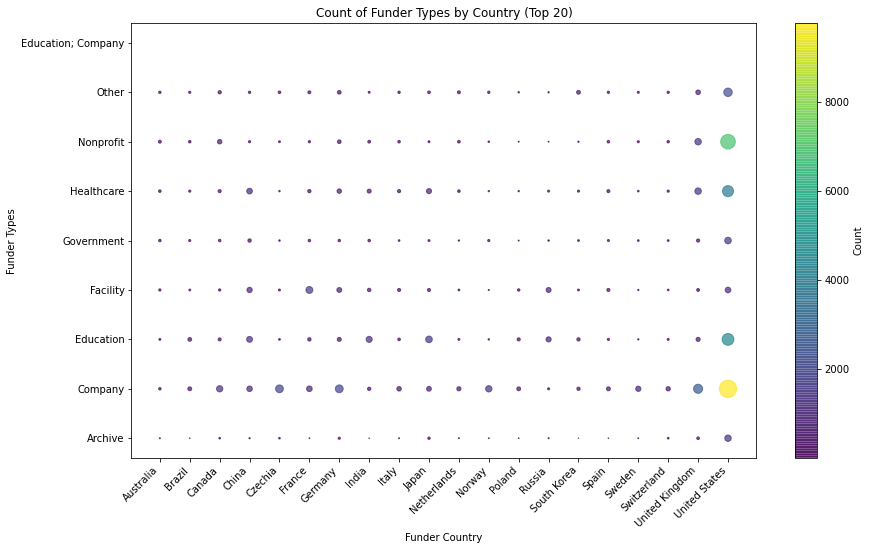

In [46]:
### The scatter chart that shows the relationship between the funder type year and funder's country

grouped_data = df.groupby(['country.country_name', 'types']).size().reset_index(name='count')
top_countries = grouped_data.groupby('country.country_name')['count'].sum().nlargest(20).index

# Filter the data for the top countries
filtered_data = grouped_data[grouped_data['country.country_name'].isin(top_countries)]

size_scaler = Normalize(vmin=filtered_data['count'].min(), vmax=filtered_data['count'].max())

# Create a scatter plot
fig, ax = plt.subplots(figsize=(14, 8))
scatter = ax.scatter(filtered_data['country.country_name'], filtered_data['types'], s=size_scaler(filtered_data['count'])*300, c=filtered_data['count'], cmap='viridis', alpha=0.7)

cbar = plt.colorbar(scatter)
cbar.set_label('Count')
ax.set_xlabel('Funder Country')
ax.set_ylabel('Funder Types')
ax.set_title('Count of Funder Types by Country (Top 20)')

plt.xticks(rotation=45, ha='right')

plt.show()


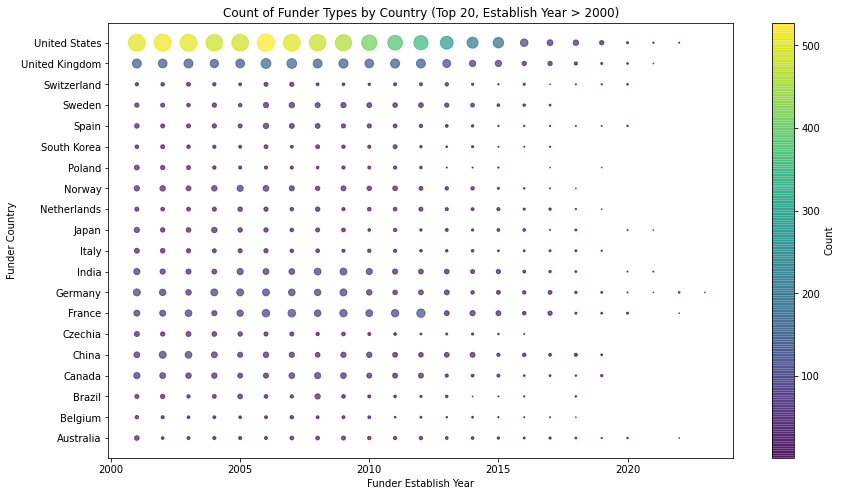

In [51]:
### The scatter chart that shows the relationship between the funder establish year and funder's country
plt.figure(figsize=(14, 8))

# Filter the DataFrame for establish years over 2000
filtered_df = df[df['established'] > 2000]

grouped_data = filtered_df.groupby(['established', 'country.country_name']).size().reset_index(name='count')

# Get the top N countries by count
top_countries = grouped_data.groupby('country.country_name')['count'].sum().nlargest(20).index
filtered_data = grouped_data[grouped_data['country.country_name'].isin(top_countries)]

size_scaler = Normalize(vmin=filtered_data['count'].min(), vmax=filtered_data['count'].max())

scatter = plt.scatter(
    filtered_data['established'], 
    filtered_data['country.country_name'], 
    s=size_scaler(filtered_data['count']) * 300, 
    c=filtered_data['count'], 
    cmap='viridis', 
    alpha=0.7
)
cbar = plt.colorbar(scatter)
cbar.set_label('Count')

plt.xlabel('Funder Establish Year')
plt.ylabel('Funder Country')
plt.title('Count of Funder Types by Country (Top 20, Establish Year > 2000)')

plt.show()


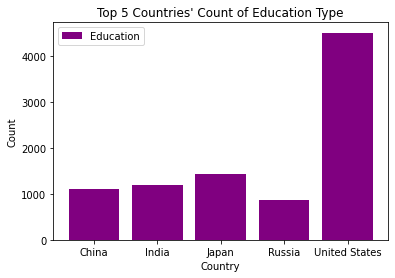

In [80]:
### The bar chart that shows the top 5 countries' funder type numbers in Education Type 
import numpy as np
import pandas as pd
# import bqplot.pyplot as plt
import matplotlib.pyplot as plt

grouped_data = df.groupby(['country.country_name', 'types']).size().reset_index(name='count')

# Filter data for the "Education" type
education_data = grouped_data[grouped_data['types'] == 'Education']

# Get the top 5 countries by count of "Education" type
top_countries = education_data.groupby('country.country_name')['count'].sum().nlargest(5).index
filtered_data = education_data[education_data['country.country_name'].isin(top_countries)]

plt.bar(filtered_data['country.country_name'], filtered_data['count'], color='purple', label='Education')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 5 Countries\' Count of Education Type')
plt.legend()

plt.show()
